# Data frames

We're going to use a real [kaggle competition](https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries) data set to explore Pandas dataframes. Grab the [rent.csv.zip](https://mlbook.explained.ai/data/rent.csv.zip) file and unzip it.

In [3]:
import pandas as pd
df = pd.read_csv("data/rent.csv")
df.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465,808 Columbus Avenue


In [4]:
df.head(2).T

,0,1
bathrooms,1.5,1
bedrooms,3,2
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130
created,2016-06-24 07:54:24,2016-06-12 12:19:27
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,
display_address,Metropolitan Avenue,Columbus Avenue
features,[],"['Doorman', 'Elevator', 'Fitness Center', 'Cat..."
interest_level,medium,low
latitude,40.7145,40.7947
listing_id,7211212,7150865


## Sniff the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        47906 non-null object
display_address    49217 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49342 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [8]:
df.price.sort_values(ascending=False).head(10)

19558    4490000
9590     1150000
30689    1070000
29665    1070000
10581     135000
25538     111111
45674     100000
29082      90000
7336       85000
47995      80000
Name: price, dtype: int64

In [39]:
prices = df['price']
avg_rent = prices.mean()
print(f"Average rent is ${avg_rent:.0f}")

Average rent is $3830


In [42]:
bybaths = df.groupby(['bathrooms']).mean()
bybaths = bybaths.reset_index() # overcome quirk in Pandas
print(bybaths[['bathrooms','price']]) # print just num baths, avg price

    bathrooms         price
0         0.0   4001.530351
1         1.0   3233.940490
2         1.5   4257.066667
3         2.0   5501.066971
4         2.5   9028.920578
5         3.0  10391.060403
6         3.5  14534.785714
7         4.0  16239.213836
8         4.5  20868.000000
9         5.0  27214.700000
10        5.5  26300.000000
11        6.0  50250.000000
12        6.5  14500.000000
13        7.0  60000.000000
14       10.0   3600.000000


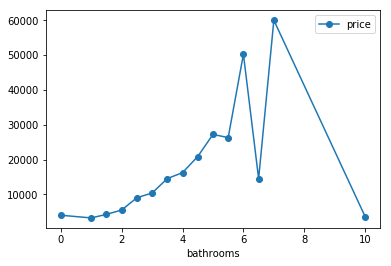

In [49]:
bybaths.plot.line('bathrooms','price', style='-o')
plt.show()

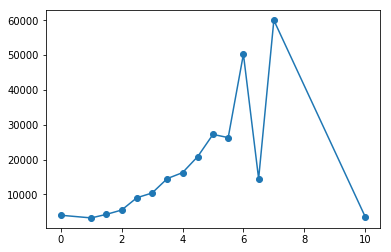

In [55]:
# OR, can do directly
plt.plot(bybaths.bathrooms, bybaths.price, marker='o') # note slightly different arguments
plt.show()

## Checking for missing values

In [35]:
df.isnull().any()

bathrooms          False
bedrooms           False
building_id        False
created            False
description         True
display_address     True
features           False
interest_level     False
latitude           False
listing_id         False
longitude          False
manager_id         False
photos             False
price              False
street_address      True
dtype: bool

In [9]:
df.bathrooms.value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64

## Plot variables

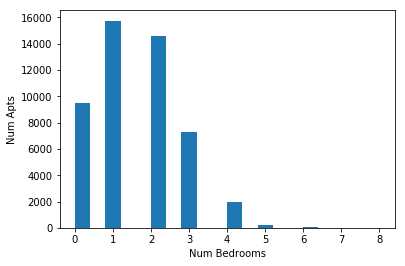

In [32]:
import matplotlib.pyplot as plt

plt.xlabel('Num Bedrooms')
plt.ylabel('Num Apts')
plt.hist(df.bedrooms, bins=20)
plt.show()

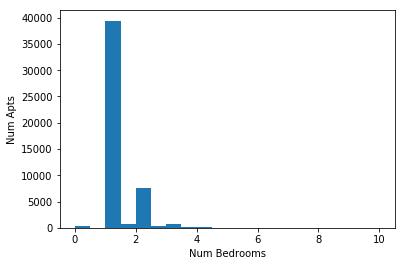

In [33]:
plt.xlabel('Num Bedrooms')
plt.ylabel('Num Apts')
plt.hist(df.bathrooms, bins=20)
plt.show()

### compare variables

In [ ]:
bybaths.plot.line('bathrooms','price', style='-o')
plt.show()

In [37]:
df.isnull().head(5).T

,0,1,2,3,4
bathrooms,False,False,False,False,False
bedrooms,False,False,False,False,False
building_id,False,False,False,False,False
created,False,False,False,False,False
description,False,False,False,False,False
display_address,False,False,False,False,False
features,False,False,False,False,False
interest_level,False,False,False,False,False
latitude,False,False,False,False,False
listing_id,False,False,False,False,False
